In [1]:
import scanpy as sc
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
sc.settings.verbosity = 3 
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)
sc.logging.print_versions()

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.19.1 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6
The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.8
scanpy      1.8.2
sinfo       0.3.4
-----
PIL                         7.2.0
appnope                     0.1.2
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
cached_property             1.5.2
cffi                        1.15.0
cycler                      0.10.0
cython_runtime     

In [2]:
results_file = '/Users/chendd/data2/pbmc3k.h5ad'
adata = sc.read_10x_mtx(
    '/Users/chendd/data2/filtered gene barcode matrix/example_GDC_C3N-00662/',
    var_names='gene_symbols',
    cache=True)
adata.var_names_make_unique()
adata

... reading from cache file cache/Users-chendd-data2-filtered gene barcode matrix-example_GDC_C3N-00662-matrix.h5ad


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/anndata/utils.py:117: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  + str(example_colliding_values)


AnnData object with n_obs × n_vars = 7037 × 60483
    var: 'gene_ids'

In [3]:
adata.obs

Empty DataFrame
Columns: []
Index: [AAACCCAAGCGAGGAG-1, AAACCCAAGGGTGGGA-1, AAACCCACACACAGAG-1, AAACCCACACATTCTT-1, AAACCCAGTCTATGAC-1, AAACCCAGTTATGTGC-1, AAACCCATCAACGAGG-1, AAACCCATCCTACCGT-1, AAACGAAAGCTATCTG-1, AAACGAACATAGAAAC-1, AAACGAACATAGTCAC-1, AAACGAACATGTCTAG-1, AAACGAAGTAATGCGG-1, AAACGAAGTGCGGATA-1, AAACGAAGTGTTTGCA-1, AAACGAATCACCTCGT-1, AAACGAATCACTGATG-1, AAACGAATCCTCTGCA-1, AAACGAATCGGACCAC-1, AAACGCTAGTTCACTG-1, AAACGCTCAAACGTGG-1, AAACGCTGTCTAGATC-1, AAACGCTGTCTTGCGG-1, AAACGCTTCACGGGAA-1, AAAGAACAGAACGTGC-1, AAAGAACAGCTATCCA-1, AAAGAACCAGAAGCTG-1, AAAGAACGTTGCCAAT-1, AAAGAACTCACCTCAC-1, AAAGAACTCATGCCAA-1, AAAGAACTCTCCCATG-1, AAAGGATAGAGCCGAT-1, AAAGGATAGCACACAG-1, AAAGGATAGGTTCACT-1, AAAGGATAGGTTCAGG-1, AAAGGATCAAGAGTAT-1, AAAGGATGTAGCTTGT-1, AAAGGATGTTAACCTG-1, AAAGGATTCTACTGCC-1, AAAGGGCAGATTAGTG-1, AAAGGGCCAGTACTAC-1, AAAGGGCGTAGGTCAG-1, AAAGGGCTCGGAGATG-1, AAAGGTAAGACGCCCT-1, AAAGGTACACCAGCTG-1, AAAGGTAGTGAATTAG-1, AAAGTCCAGCCGTAAG-1, AAAGTCCAGCCTAGGA-1, AAAGTCCAGCCTATCA-1, AAAGTCCAGTTACTCG-1, AAAGTCCCATGGCACC-1, AAAGTCCCATTATGCG-1, AAAGTCCTCGGCCTTT-1, AAAGTGAAGACTAAGT-1, AAAGTGACACTCAGAT-1, AAAGTGACACTTGGGC-1, AAAGTGAGTAGGATAT-1, AAAGTGATCACGGTCG-1, AAAGTGATCCGTGGTG-1, AAATGGAAGTTGGAGC-1, AAATGGACAGCACAGA-1, AAATGGAGTGCACGCT-1, AAATGGATCAGCCTTC-1, AACAAAGAGAAAGCGA-1, AACAAAGAGATAGCAT-1, AACAAAGAGGGAACAA-1, AACAAAGAGTAACGTA-1, AACAAAGCAGCCGGTT-1, AACAAAGGTAATGCTC-1, AACAACCAGGATTCAA-1, AACAACCAGGCTTAGG-1, AACAACCTCAAAGGTA-1, AACAACCTCAAATGAG-1, AACAACCTCCATCTGC-1, AACAACCTCTCTAGGA-1, AACAACCTCTTCGATT-1, AACAAGAAGGATGAGA-1, AACAAGAGTAGTACGG-1, AACACACAGCTGGCCT-1, AACACACAGGTTCCGC-1, AACACACCAATGTGGG-1, AACACACCATTAAGCC-1, AACACACGTCCCGTGA-1, AACACACGTGCCCGTA-1, AACACACTCAACGAGG-1, AACACACTCATCCTAT-1, AACACACTCCGCAACG-1, AACACACTCTGGTGGC-1, AACAGGGAGTCGTTAC-1, AACAGGGCACTCCGAG-1, AACAGGGCAGCACGAA-1, AACAGGGGTGACTAAA-1, AACAGGGGTGCCTTTC-1, AACAGGGGTTACGTAC-1, AACAGGGTCGTTCTAT-1, AACCAACCAGGTTTAC-1, AACCAACCATGTGCCG-1, AACCAACGTTGTGTTG-1, AACCAACTCCGACGGT-1, AACCACAAGAGAACCC-1, ...]

[7037 rows x 0 columns]

In [4]:
adata.var

gene_ids
DDX11L1       ENSG00000223972.5
WASH7P        ENSG00000227232.5
MIR6859-3     ENSG00000278267.1
RP11-34P13.3  ENSG00000243485.3
MIR1302-9     ENSG00000274890.1
...                         ...
MT-ND6        ENSG00000198695.2
MT-TE         ENSG00000210194.1
MT-CYB        ENSG00000198727.2
MT-TT         ENSG00000210195.2
MT-TP         ENSG00000210196.2

[60483 rows x 1 columns]

normalizing counts per cell
    finished (0:00:00)


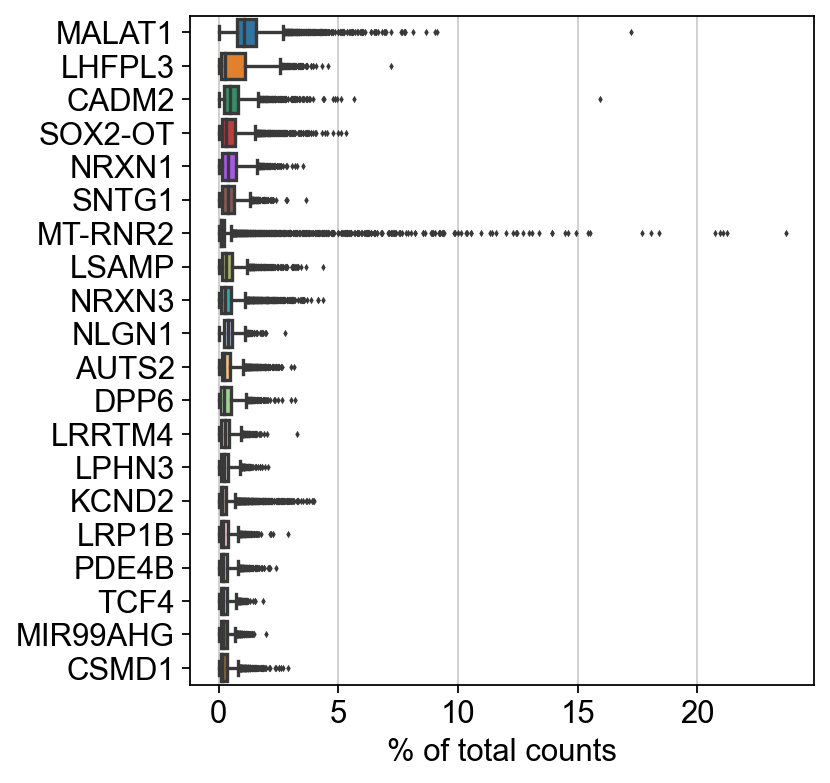

In [5]:
sc.pl.highest_expr_genes(adata, n_top=20)

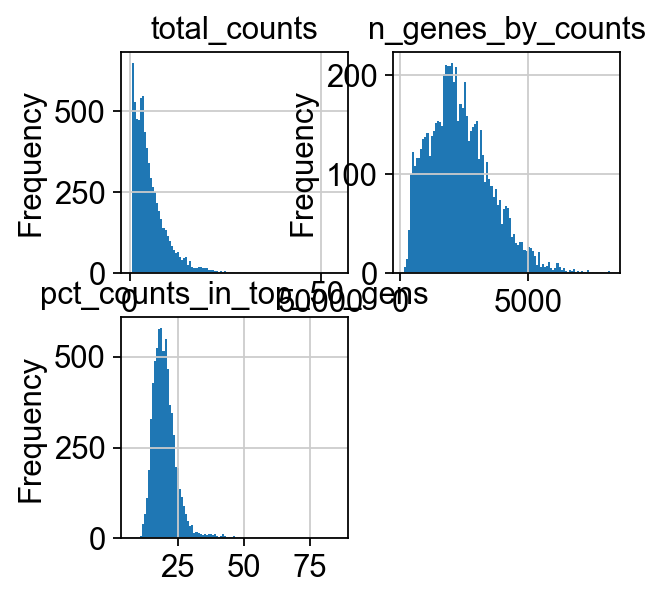

In [6]:
qcmatrix = sc.pp.calculate_qc_metrics(adata)
plt.subplot(2,2,1)
qcmatrix[0]['total_counts'].plot.hist(bins=100)
plt.title('total_counts')

plt.subplot(2,2,2)
qcmatrix[0]['n_genes_by_counts'].plot.hist(bins=100)
plt.title('n_genes_by_counts')

plt.subplot(2,2,3)
qcmatrix[0]['pct_counts_in_top_50_genes'].plot.hist(bins=100)
plt.title('pct_counts_in_top_50_gens')
plt.show()

In [7]:
qcmatrix[1]

n_cells_by_counts  mean_counts  log1p_mean_counts  \
DDX11L1                       0     0.000000           0.000000   
WASH7P                       99     0.014353           0.014251   
MIR6859-3                     0     0.000000           0.000000   
RP11-34P13.3                  2     0.000284           0.000284   
MIR1302-9                     0     0.000000           0.000000   
...                         ...          ...                ...   
MT-ND6                      497     0.092085           0.088088   
MT-TE                         0     0.000000           0.000000   
MT-CYB                     1592     0.887026           0.635002   
MT-TT                         0     0.000000           0.000000   
MT-TP                         3     0.000426           0.000426   

              pct_dropout_by_counts  total_counts  log1p_total_counts  
DDX11L1                  100.000000           0.0            0.000000  
WASH7P                    98.593150         101.0            4.624973  
MIR6859-3                100.000000           0.0            0.000000  
RP11-34P13.3              99.971579           2.0            1.098612  
MIR1302-9                100.000000           0.0            0.000000  
...                             ...           ...                 ...  
MT-ND6                    92.937331         648.0            6.475433  
MT-TE                    100.000000           0.0            0.000000  
MT-CYB                    77.376723        6242.0            8.739216  
MT-TT                    100.000000           0.0            0.000000  
MT-TP                     99.957368           3.0            1.386294  

[60483 rows x 6 columns]

In [9]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt']=adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata

AnnData object with n_obs × n_vars = 7032 × 28330
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

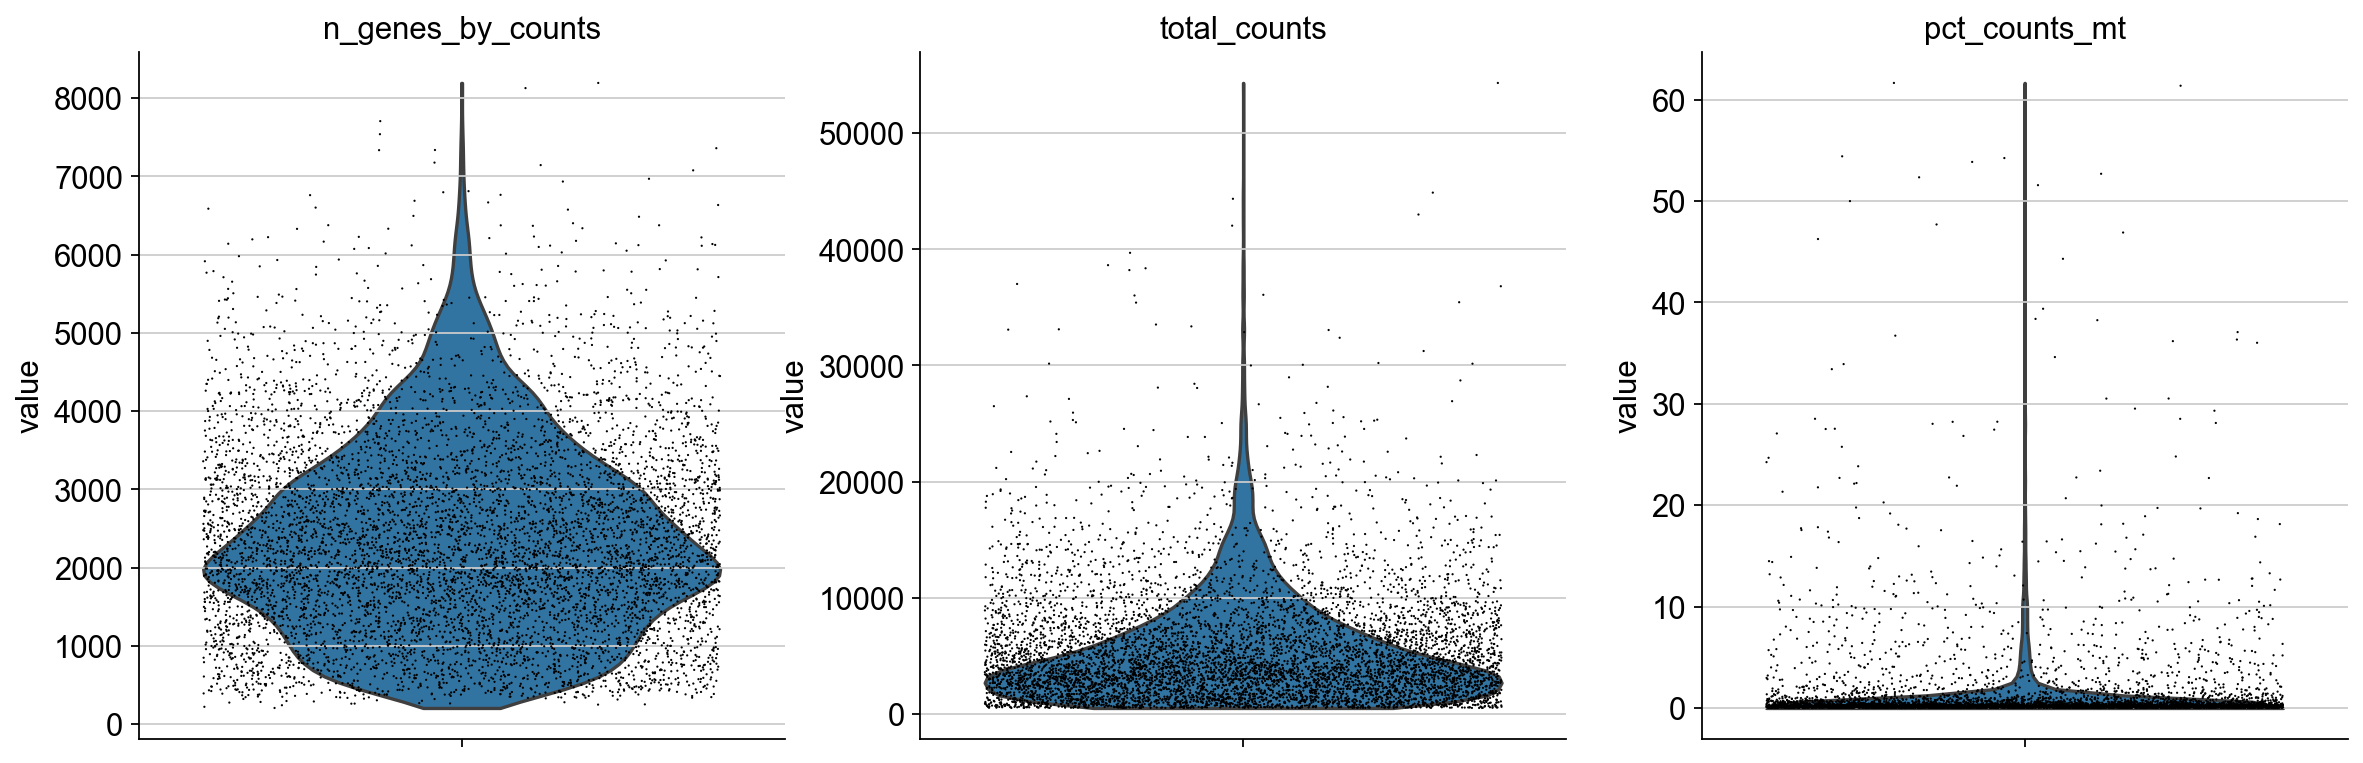

In [10]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)


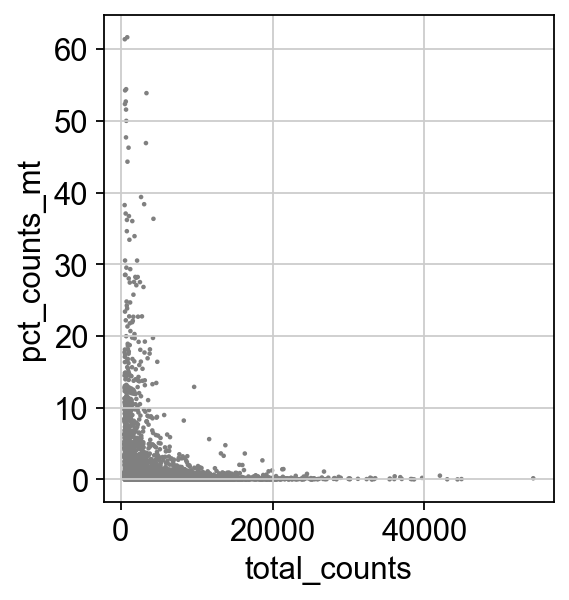

In [11]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

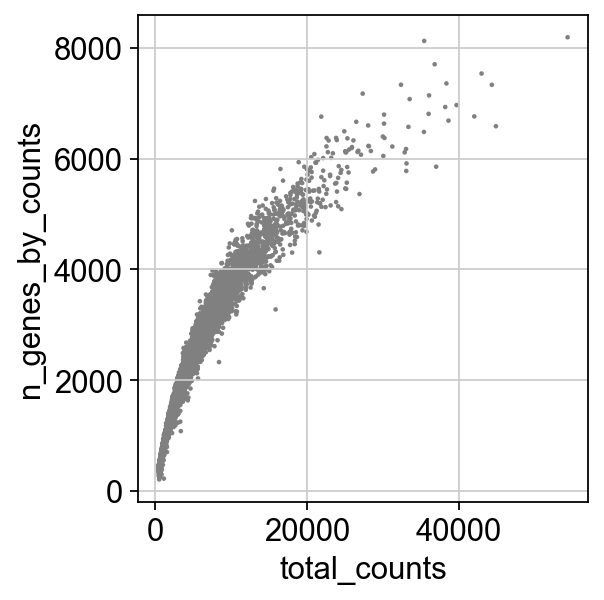

In [12]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [13]:
adata=adata[adata.obs.n_genes_by_counts<2500, :]
adata

View of AnnData object with n_obs × n_vars = 4168 × 28330
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [14]:
adata=adata[adata.obs.pct_counts_mt<5, :]
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


AnnData object with n_obs × n_vars = 3791 × 28330
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [16]:
adata=adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata, max_value=10)

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:17)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


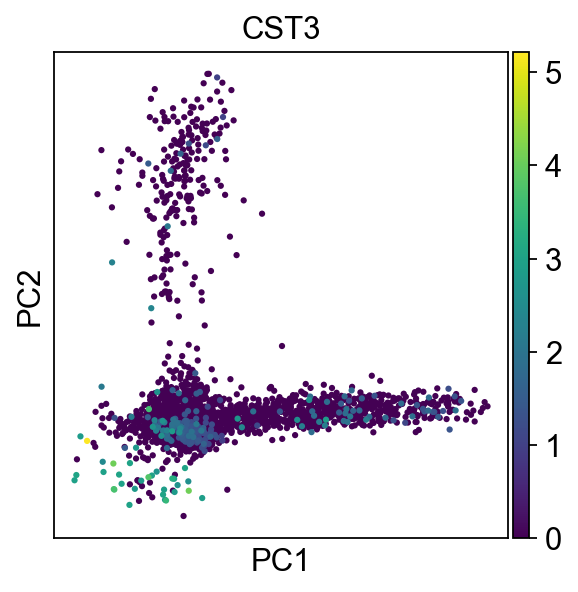

In [17]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CST3')

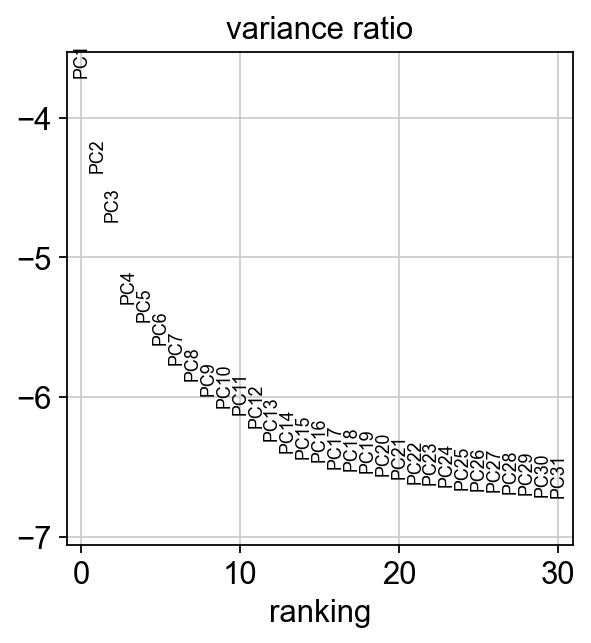

In [18]:
sc.pl.pca_variance_ratio(adata, log=True)

In [19]:
adata.write(results_file)

In [20]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


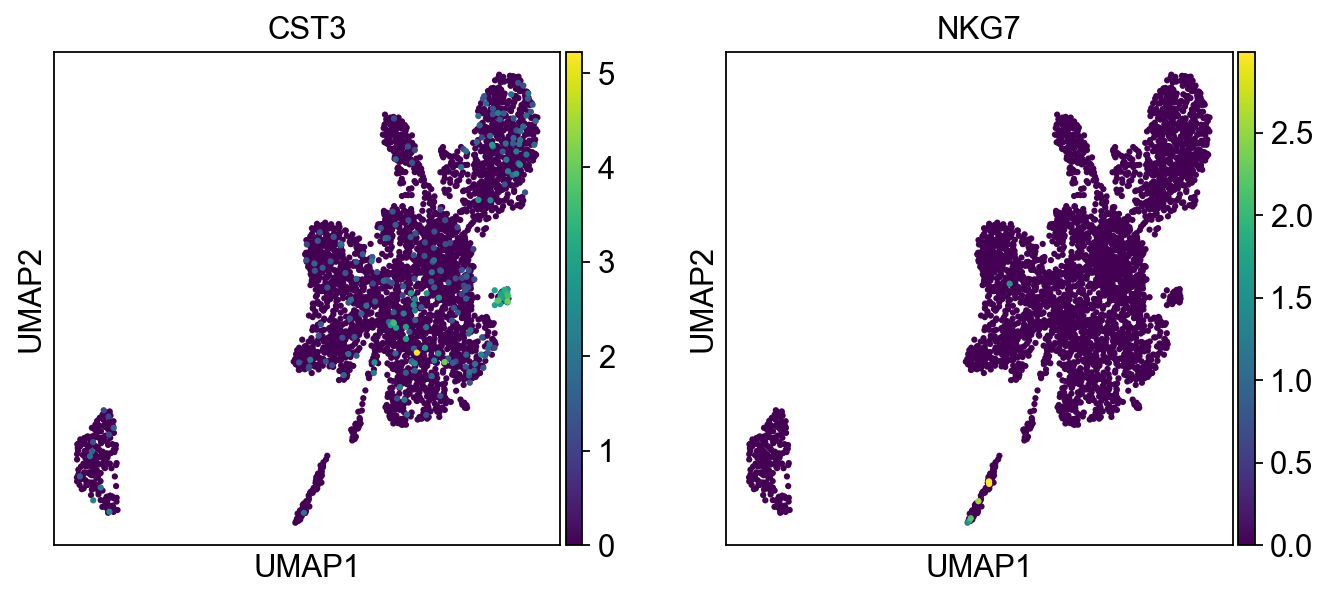

In [21]:
sc.pl.umap(adata, color=['CST3', 'NKG7'])

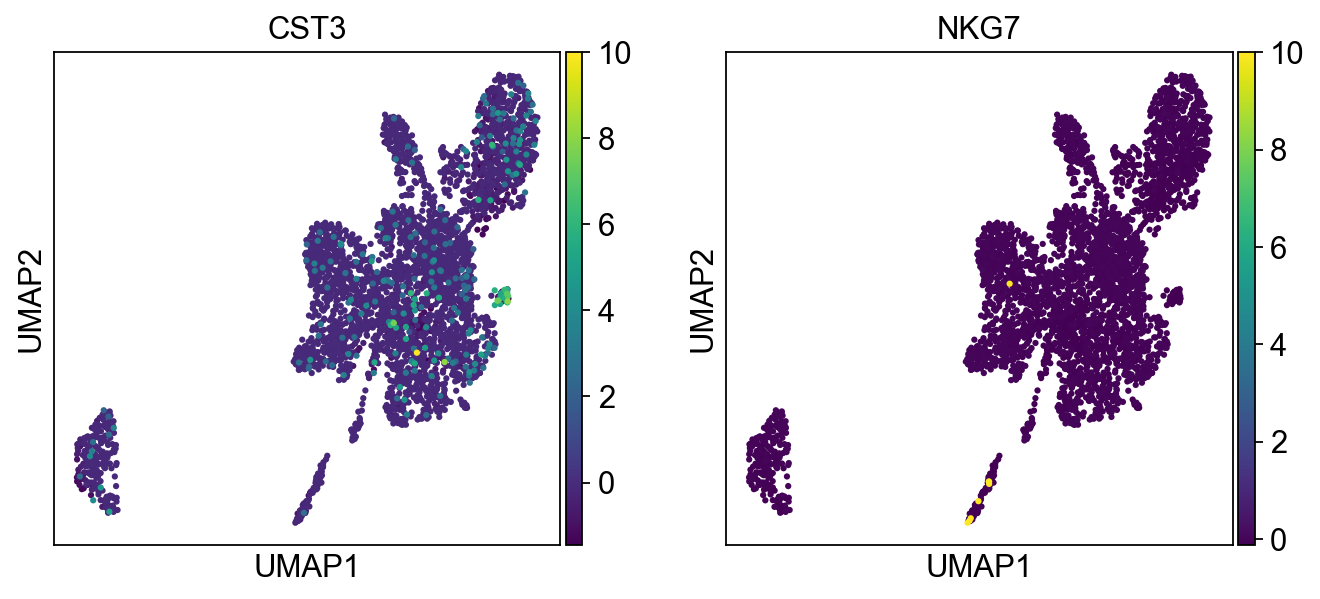

In [22]:
sc.pl.umap(adata, color=['CST3', 'NKG7'], use_raw=False)

In [23]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


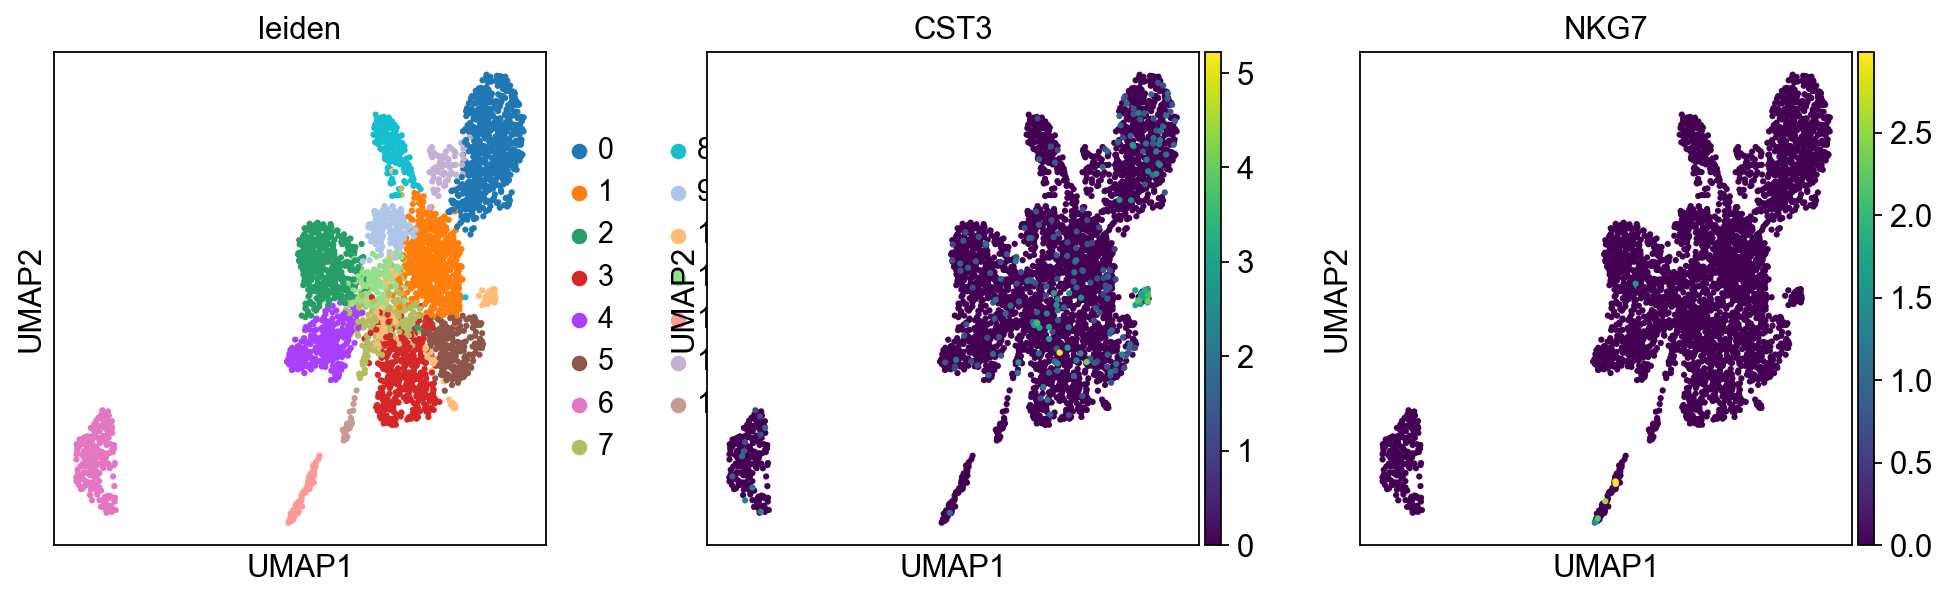

In [24]:
sc.pl.umap(adata, color=['leiden', 'CST3', 'NKG7'])

In [25]:
adata.write(results_file)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


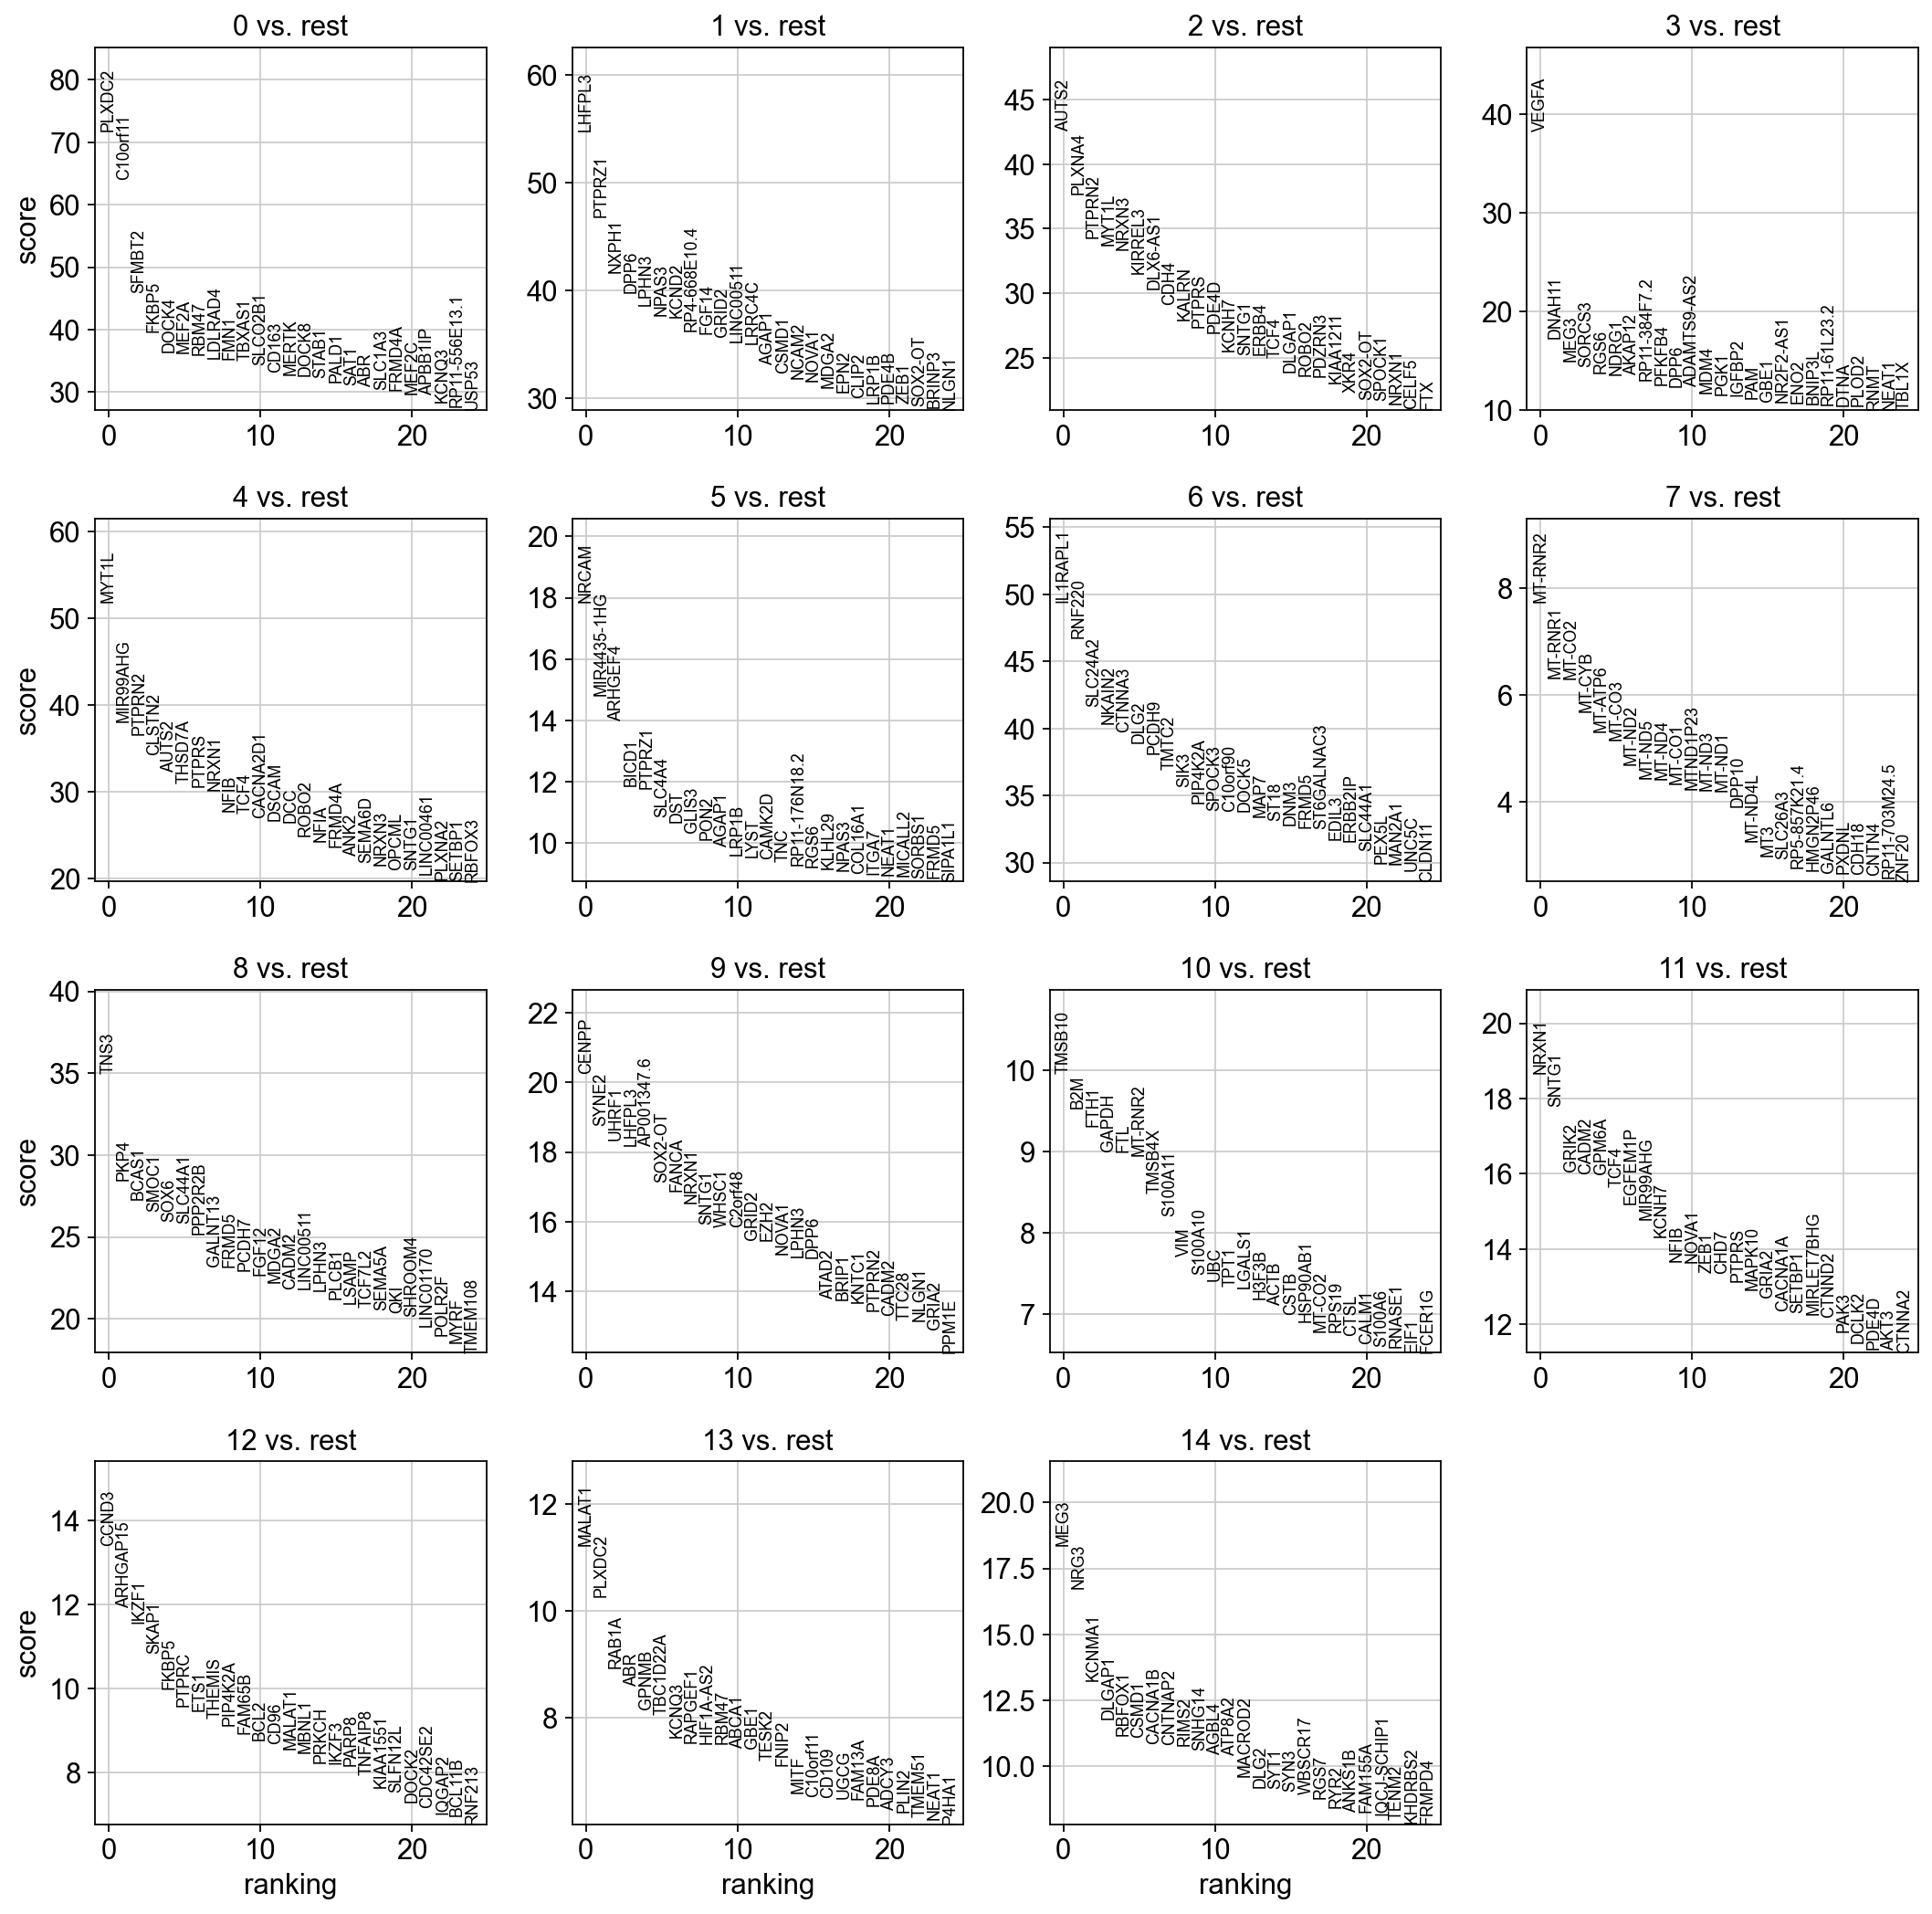

In [26]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [37]:
adata

AnnData object with n_obs × n_vars = 3791 × 4803
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [61]:
adata.obsm

AxisArrays with keys: X_pca, X_umap

In [71]:
dedf0 = sc.get.rank_genes_groups_df(adata, group="0")
dedf1= sc.get.rank_genes_groups_df(adata, group="1")

In [72]:
sc.settings.verbosity = 2  # reduce the verbosity

ranking genes
    finished (0:00:07)


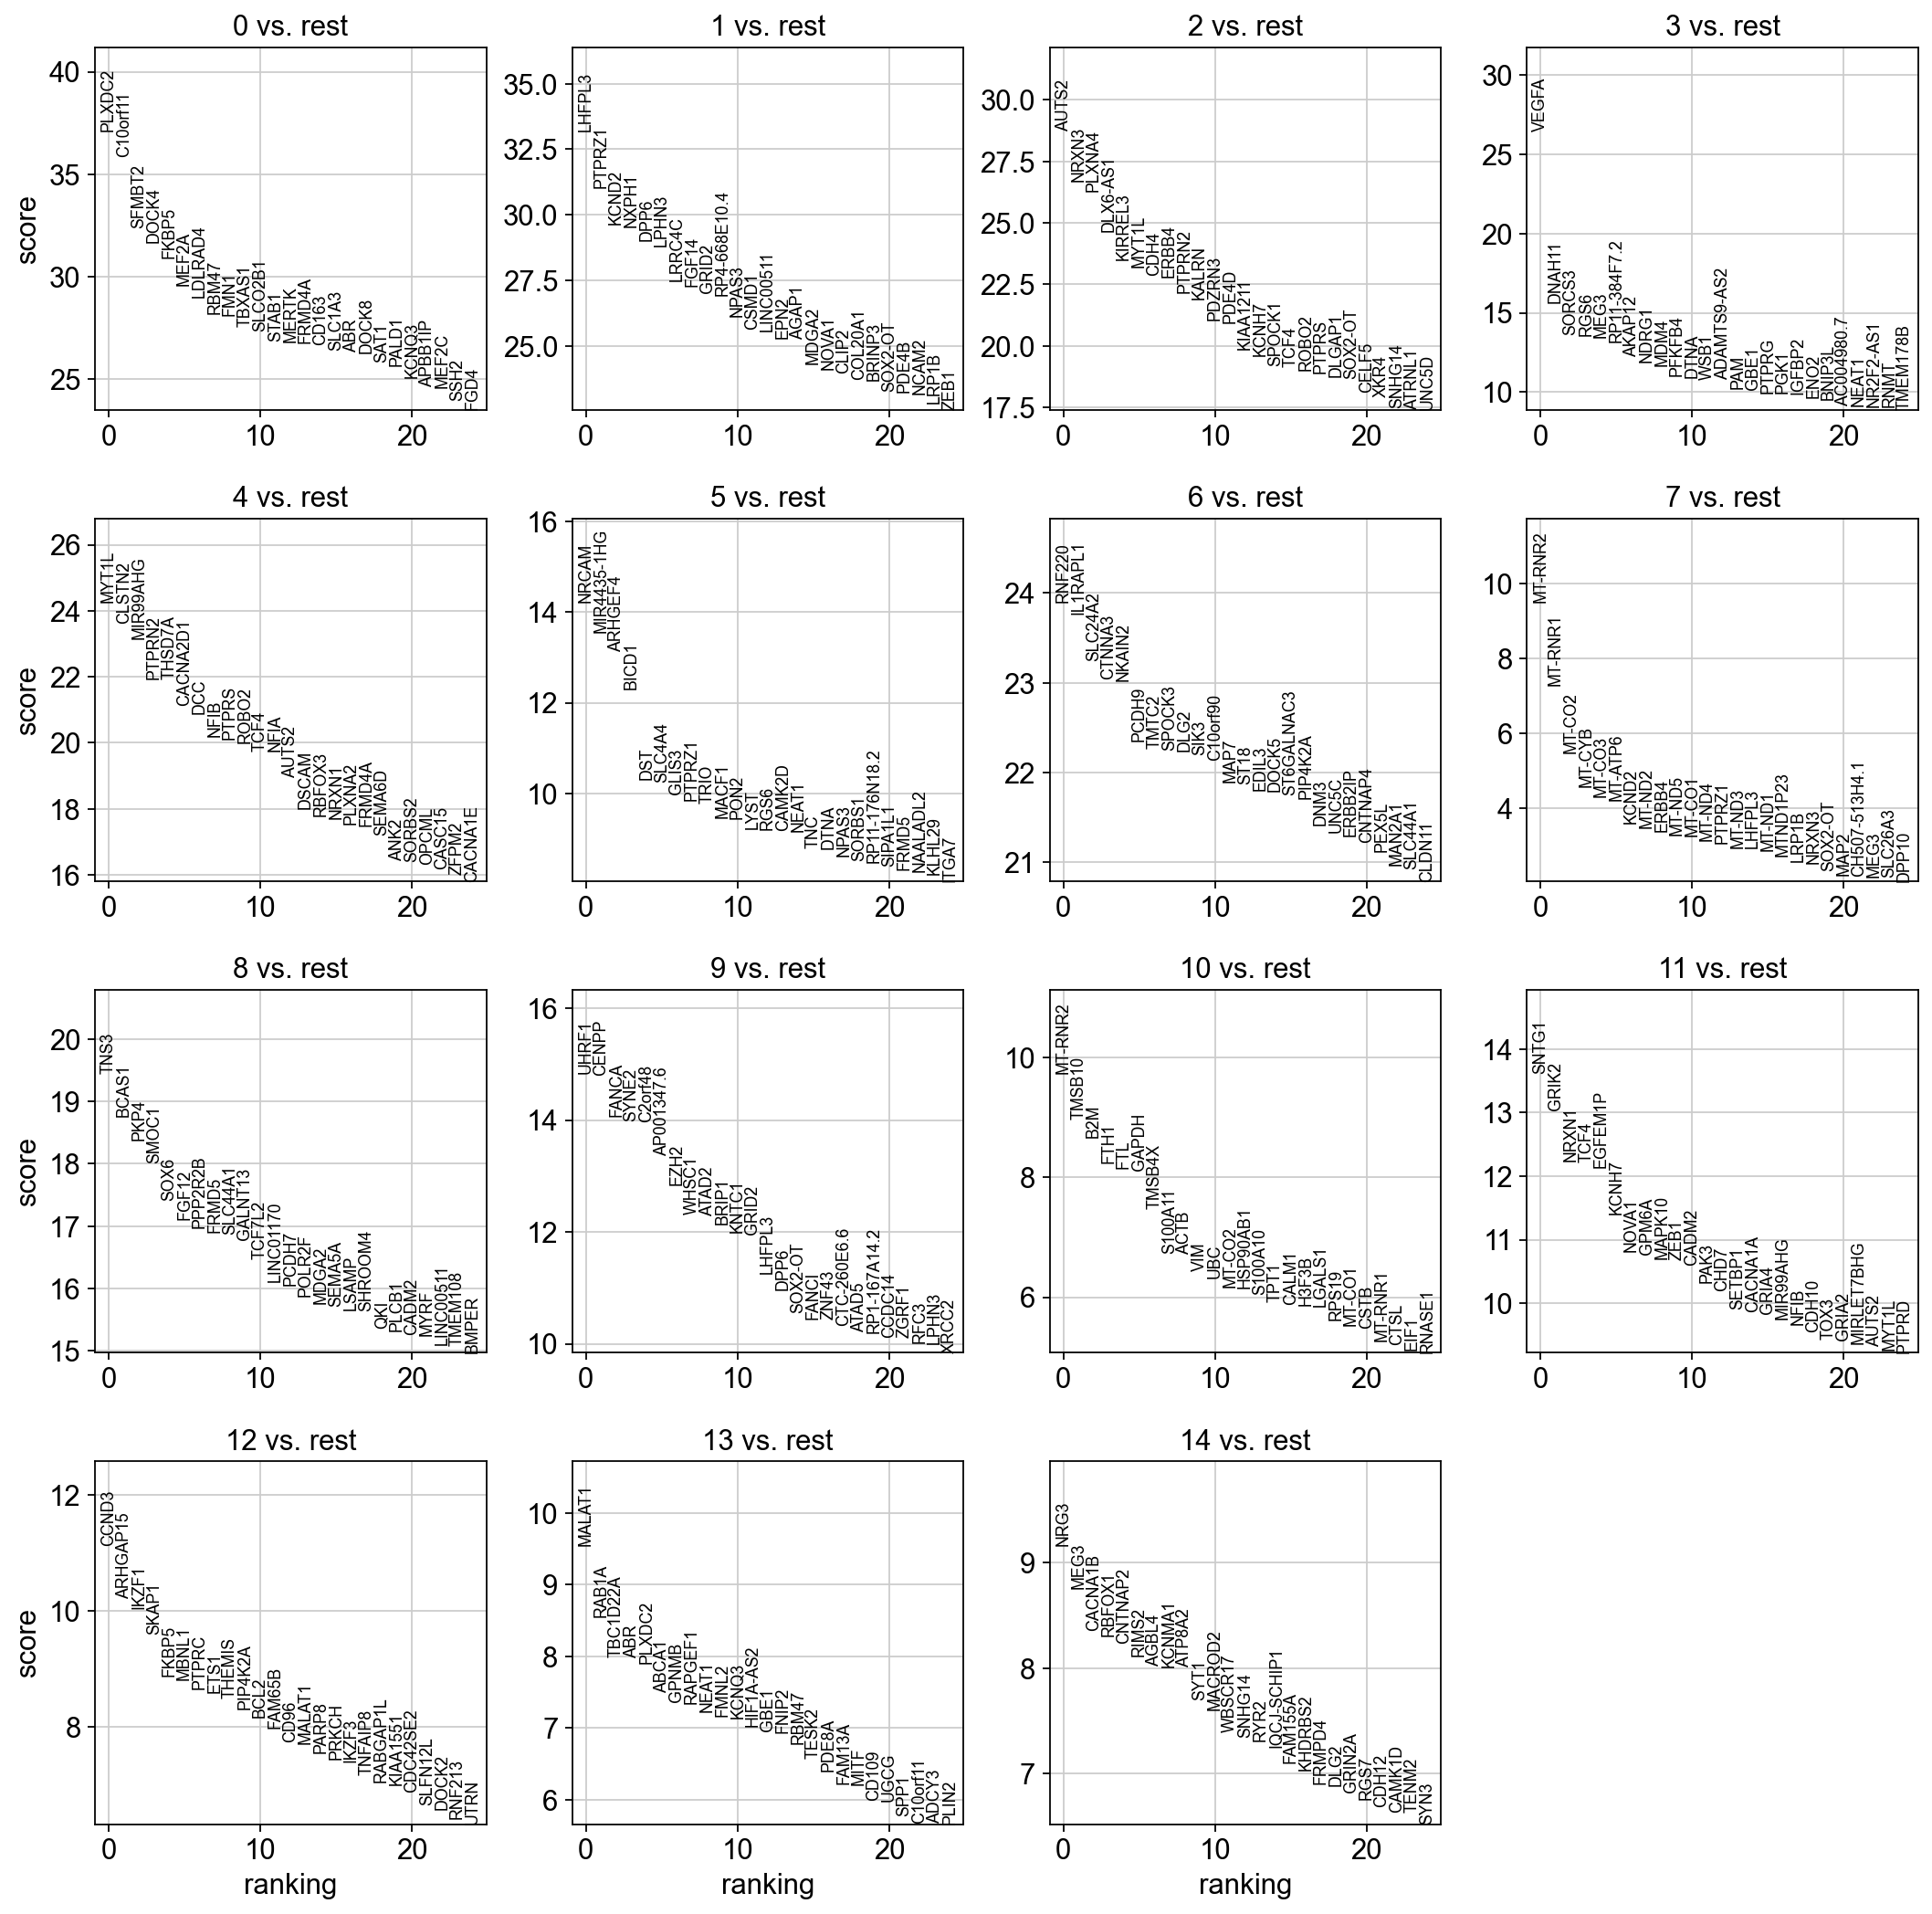

In [73]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [74]:
adata.write(results_file)

ranking genes
    finished (0:00:23)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


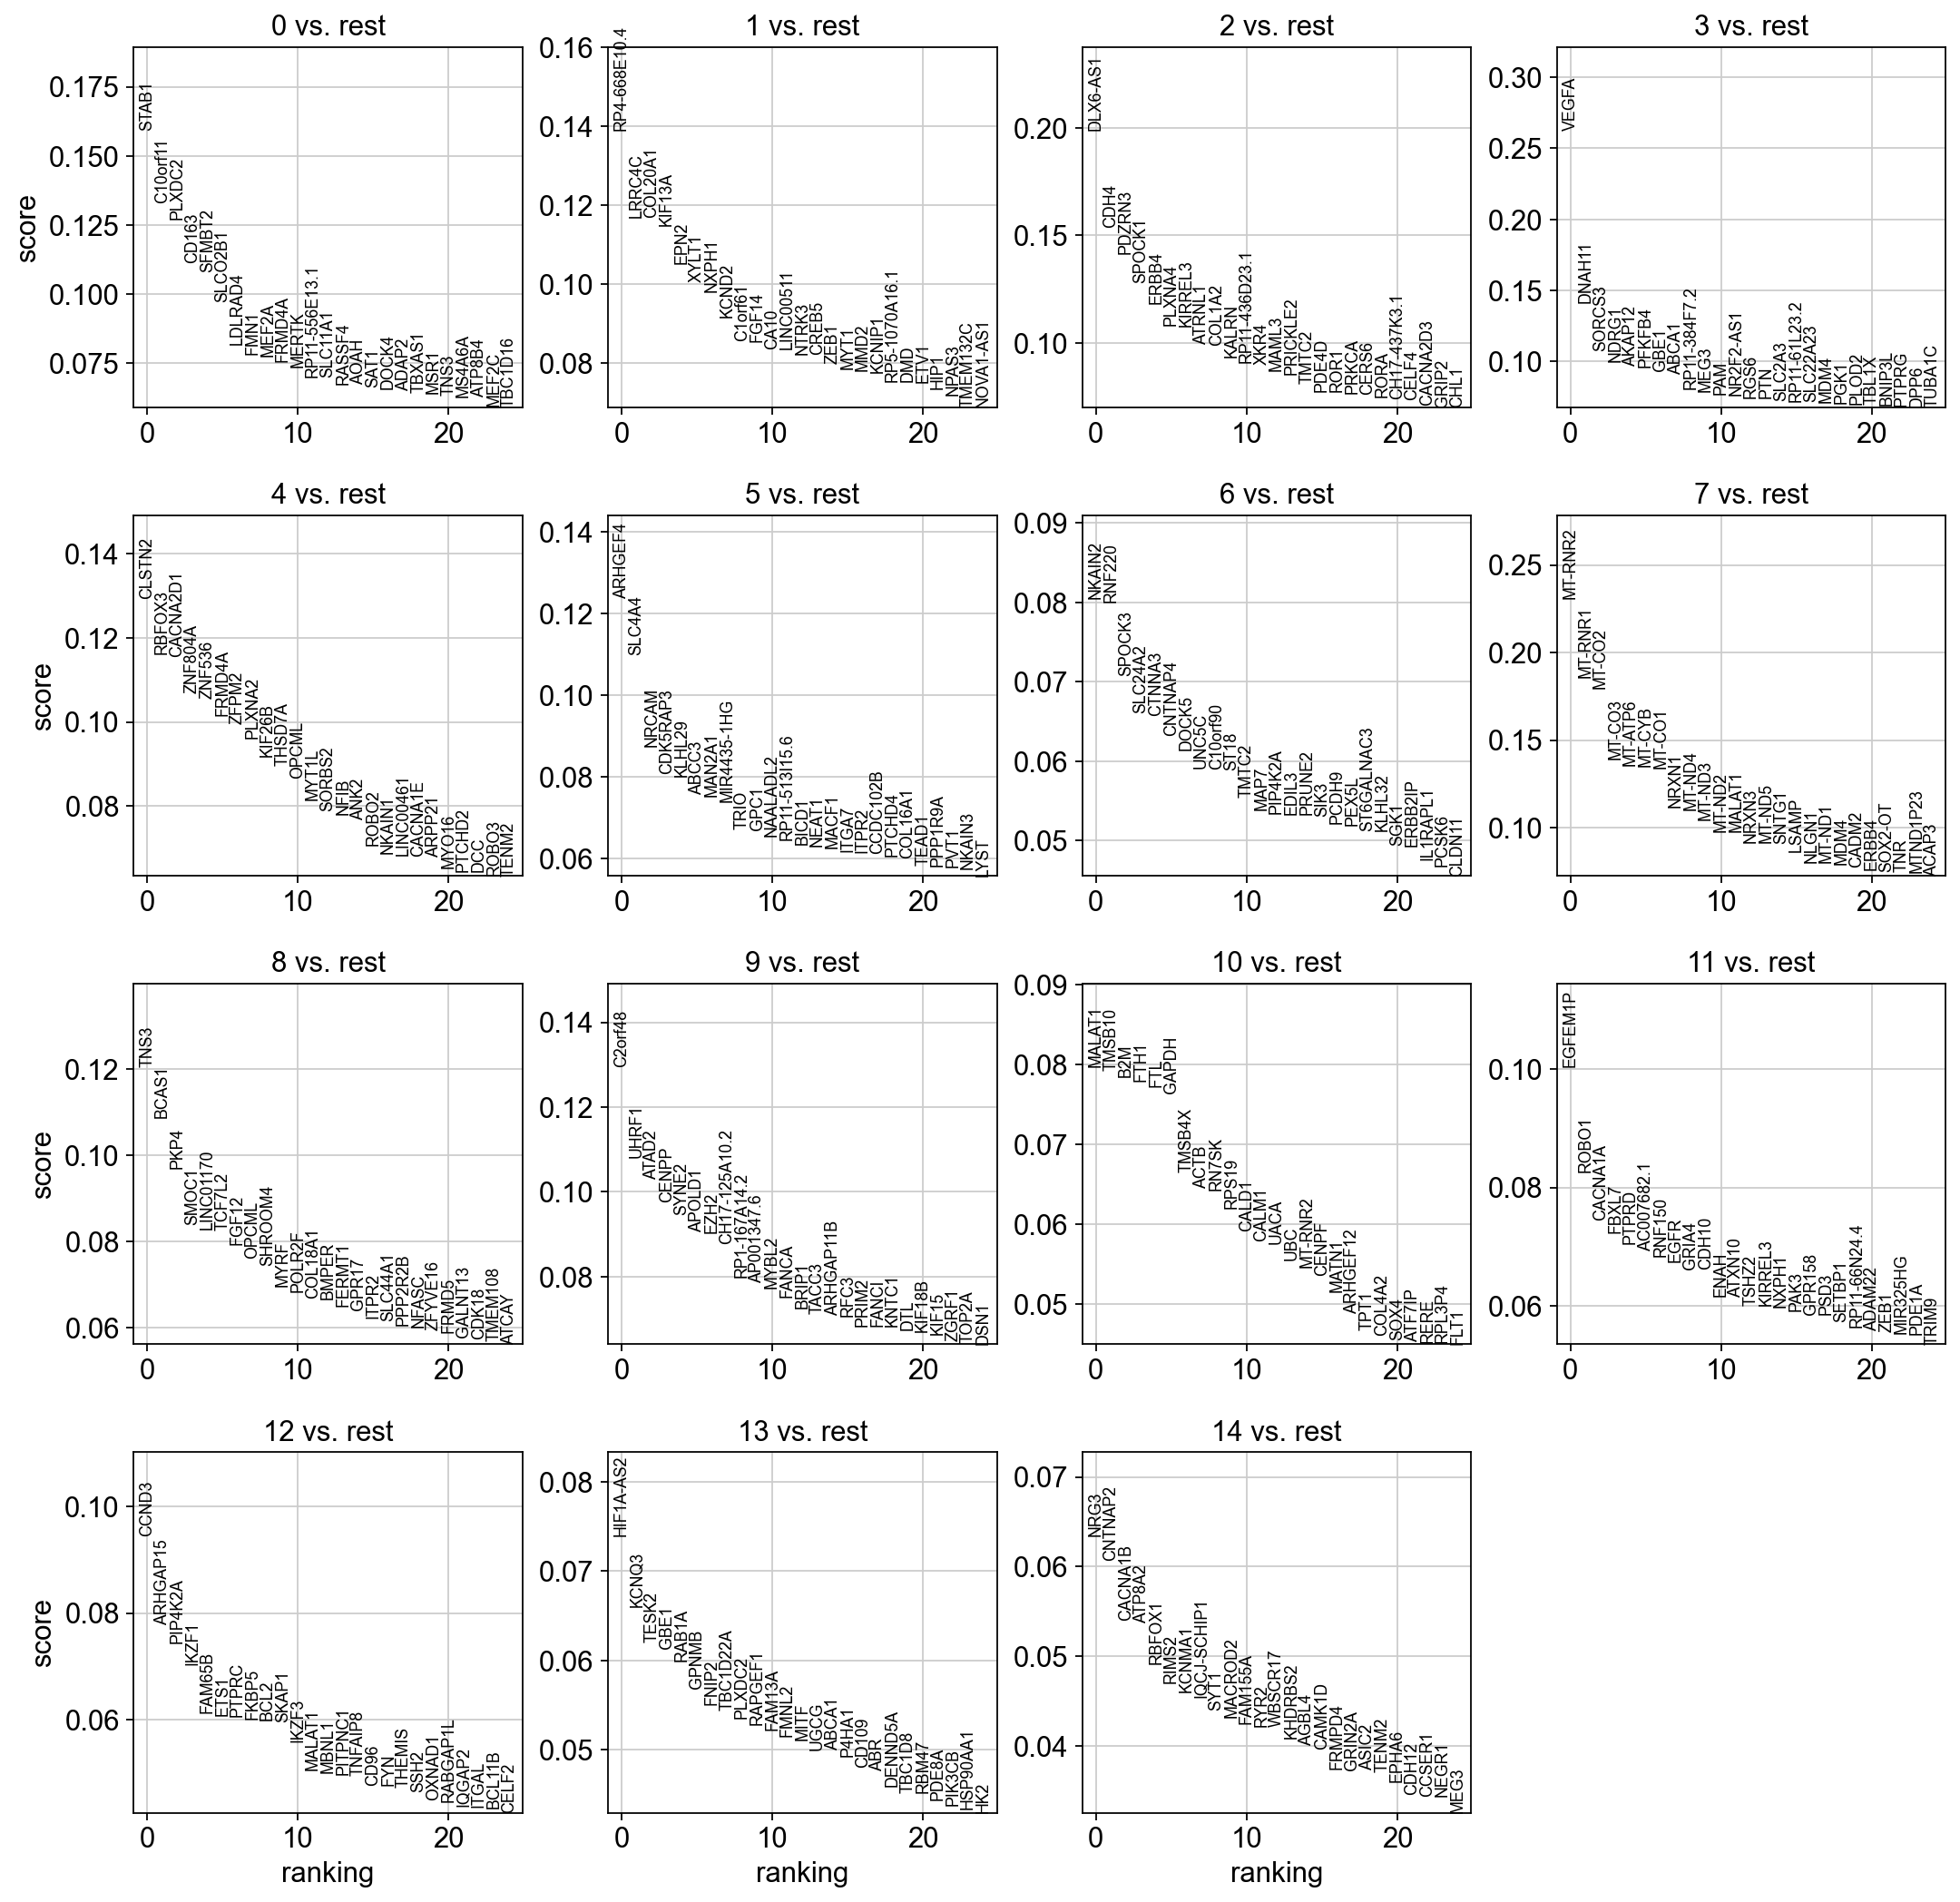

In [75]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [76]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [77]:
adata = sc.read(results_file)

In [85]:
pd.DataFrame(adata.obsp)

0
0  connectivities
1       distances

In [86]:
adata

AnnData object with n_obs × n_vars = 3791 × 4803
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [95]:
pd.DataFrame(adata.var['n_cells_by_counts'])# check the raw data inside adata

n_cells_by_counts
RP11-34P13.15                 19
AP006222.2                    39
RP5-857K21.4                 662
MTND1P23                     763
MTATP6P1                     156
...                          ...
MT-ND4L                      899
MT-ND4                      2199
MT-ND5                      1598
MT-ND6                       496
MT-CYB                      1589

[4803 rows x 1 columns]

In [121]:
pd.DataFrame(adata.varm)

0
0  PCs

In [108]:
adata.uns['pca'].keys()

dict_keys(['params', 'variance', 'variance_ratio'])

In [100]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

0             1         2             3         4              5  \
0     PLXDC2        LHFPL3     AUTS2         VEGFA     MYT1L          NRCAM   
1   C10orf11        PTPRZ1     NRXN3        DNAH11    CLSTN2    MIR4435-1HG   
2     SFMBT2         KCND2    PLXNA4        SORCS3  MIR99AHG        ARHGEF4   
3      DOCK4         NXPH1  DLX6-AS1          RGS6    PTPRN2          BICD1   
4      FKBP5          DPP6   KIRREL3          MEG3    THSD7A            DST   
5      MEF2A         LPHN3     MYT1L  RP11-384F7.2  CACNA2D1         SLC4A4   
6    LDLRAD4        LRRC4C      CDH4        AKAP12       DCC          GLIS3   
7      RBM47         FGF14     ERBB4         NDRG1      NFIB         PTPRZ1   
8       FMN1         GRID2    PTPRN2          MDM4     PTPRS           TRIO   
9     TBXAS1  RP4-668E10.4     KALRN        PFKFB4     ROBO2          MACF1   
10   SLCO2B1         NPAS3    PDZRN3          DTNA      TCF4           PON2   
11     STAB1         CSMD1     PDE4D          WSB1      NFIA           LYST   
12     MERTK     LINC00511  KIAA1211   ADAMTS9-AS2     AUTS2           RGS6   
13    FRMD4A          EPN2     KCNH7           PAM     DSCAM         CAMK2D   
14     CD163         AGAP1    SPOCK1          GBE1    RBFOX3          NEAT1   
15    SLC1A3         MDGA2      TCF4         PTPRG     NRXN1            TNC   
16       ABR         NOVA1     ROBO2          PGK1    PLXNA2           DTNA   
17     DOCK8         CLIP2     PTPRS        IGFBP2    FRMD4A          NPAS3   
18      SAT1       COL20A1    DLGAP1          ENO2    SEMA6D         SORBS1   
19     PALD1        BRINP3   SOX2-OT        BNIP3L      ANK2  RP11-176N18.2   

             6         7          8             9        10        11  \
0       RNF220   MT-RNR2       TNS3         UHRF1   MT-RNR2     SNTG1   
1     IL1RAPL1   MT-RNR1      BCAS1         CENPP    TMSB10     GRIK2   
2      SLC24A2    MT-CO2       PKP4         FANCA       B2M     NRXN1   
3       CTNNA3    MT-CYB      SMOC1         SYNE2      FTH1      TCF4   
4       NKAIN2    MT-CO3       SOX6       C2orf48       FTL   EGFEM1P   
5        PCDH9   MT-ATP6      FGF12    AP001347.6     GAPDH     KCNH7   
6        TMTC2     KCND2    PPP2R2B          EZH2    TMSB4X     NOVA1   
7       SPOCK3    MT-ND2      FRMD5         WHSC1   S100A11     GPM6A   
8         DLG2     ERBB4    SLC44A1         ATAD2      ACTB    MAPK10   
9         SIK3    MT-ND5    GALNT13         BRIP1       VIM      ZEB1   
10    C10orf90    MT-CO1     TCF7L2         KNTC1       UBC     CADM2   
11        MAP7    MT-ND4  LINC01170         GRID2    MT-CO2      PAK3   
12        ST18    PTPRZ1      PCDH7        LHFPL3  HSP90AB1      CHD7   
13       EDIL3    MT-ND3     POLR2F          DPP6   S100A10    SETBP1   
14       DOCK5    LHFPL3      MDGA2       SOX2-OT      TPT1   CACNA1A   
15  ST6GALNAC3    MT-ND1     SEMA5A         FANCI     CALM1     GRIA4   
16     PIP4K2A  MTND1P23      LSAMP         ZNF43     H3F3B  MIR99AHG   
17        DNM3     LRP1B    SHROOM4   CTC-260E6.6    LGALS1      NFIB   
18       UNC5C     NRXN3        QKI         ATAD5     RPS19     CDH10   
19     ERBB2IP   SOX2-OT      PLCB1  RP1-167A14.2    MT-CO1      TOX3   

          12         13           14  
0      CCND3     MALAT1         NRG3  
1   ARHGAP15      RAB1A         MEG3  
2      IKZF1   TBC1D22A      CACNA1B  
3      SKAP1        ABR       RBFOX1  
4      FKBP5     PLXDC2      CNTNAP2  
5      MBNL1      ABCA1        RIMS2  
6      PTPRC      GPNMB        AGBL4  
7       ETS1    RAPGEF1       KCNMA1  
8     THEMIS      NEAT1       ATP8A2  
9    PIP4K2A      FMNL2         SYT1  
10      BCL2      KCNQ3      MACROD2  
11    FAM65B  HIF1A-AS2      WBSCR17  
12      CD96       GBE1       SNHG14  
13    MALAT1      FNIP2         RYR2  
14     PARP8      RBM47  IQCJ-SCHIP1  
15     PRKCH      TESK2      FAM155A  
16     IKZF3      PDE8A      KHDRBS2  
17   TNFAIP8     FAM13A       FRMPD4  
18  RABGAP1L       MITF         DLG2  
19  KIAA1551      CD109       GRIN2A

In [99]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n            0_p     1_n            1_p       2_n            2_p  \
0    PLXDC2  2.411520e-301  LHFPL3  1.446232e-241     AUTS2  1.687291e-181   
1  C10orf11  2.349683e-281  PTPRZ1  1.819562e-211     NRXN3  7.852080e-157   
2    SFMBT2  4.474686e-230   KCND2  4.013695e-193    PLXNA4  2.206743e-152   
3     DOCK4  5.630847e-220   NXPH1  1.722260e-191  DLX6-AS1  2.714690e-134   
4     FKBP5  4.656528e-210    DPP6  4.832596e-185   KIRREL3  3.398204e-122   

      3_n            3_p       4_n            4_p  ...     10_n          10_p  \
0   VEGFA  2.352292e-154     MYT1L  6.566703e-130  ...  MT-RNR2  2.261864e-22   
1  DNAH11   2.980011e-55    CLSTN2  2.588822e-123  ...   TMSB10  3.069938e-19   
2  SORCS3   3.492799e-42  MIR99AHG  1.458172e-118  ...      B2M  4.268678e-18   
3    RGS6   8.498606e-42    PTPRN2  1.161113e-106  ...     FTH1  1.827168e-16   
4    MEG3   4.644604e-41    THSD7A  1.769511e-106  ...      FTL  3.630689e-16   

      11_n          11_p      12_n          12_p      13_n          13_p  \
0    SNTG1  3.549201e-42     CCND3  8.593177e-29    MALAT1  1.306839e-21   
1    GRIK2  7.270909e-39  ARHGAP15  1.753912e-24     RAB1A  1.237751e-17   
2    NRXN1  2.001004e-34     IKZF1  1.072333e-23  TBC1D22A  1.300354e-15   
3     TCF4  2.490688e-34     SKAP1  8.009739e-22       ABR  1.501223e-15   
4  EGFEM1P  6.953069e-34     FKBP5  7.120716e-19    PLXDC2  2.863528e-15   

      14_n          14_p  
0     NRG3  4.951053e-20  
1     MEG3  1.993533e-18  
2  CACNA1B  6.626581e-17  
3   RBFOX1  1.021760e-16  
4  CNTNAP2  1.786356e-16  

[5 rows x 30 columns]

ranking genes
    finished (0:00:01)


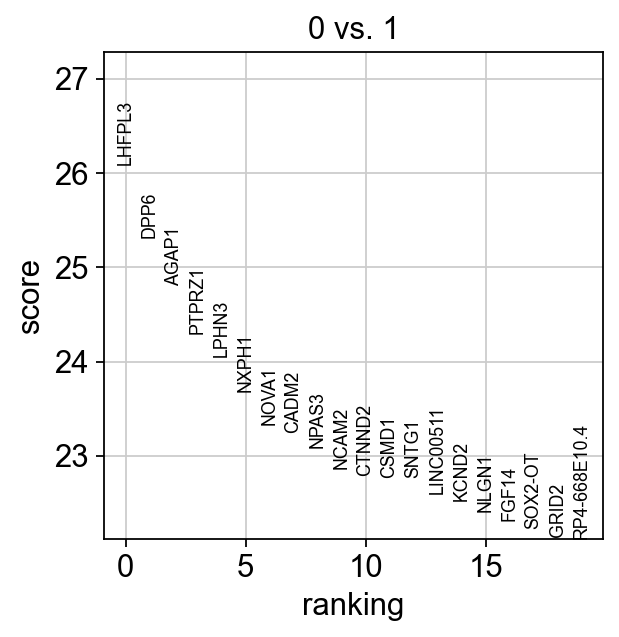

In [36]:
sc.tl.rank_genes_groups(adata, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

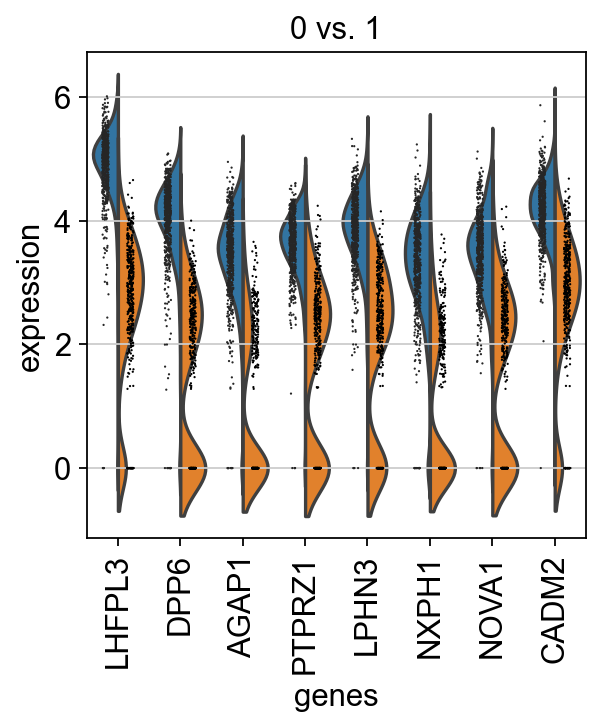

In [37]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

In [38]:
adata = sc.read(results_file)

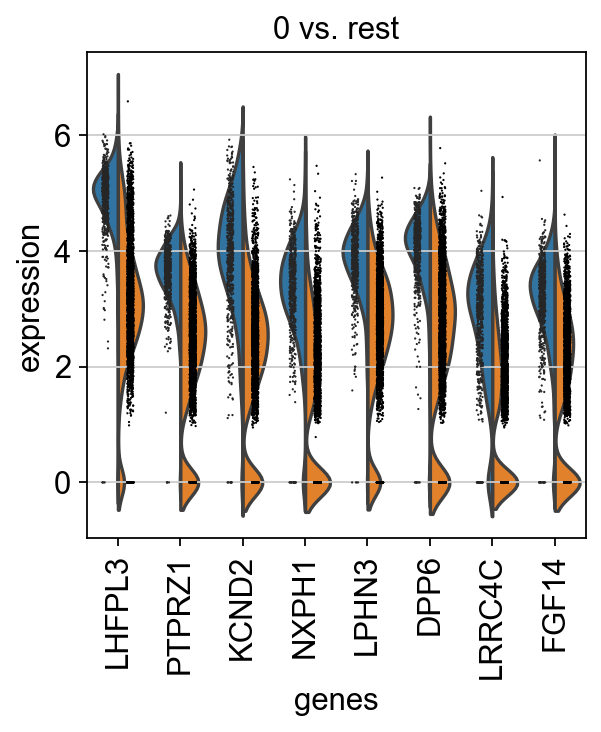

In [39]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

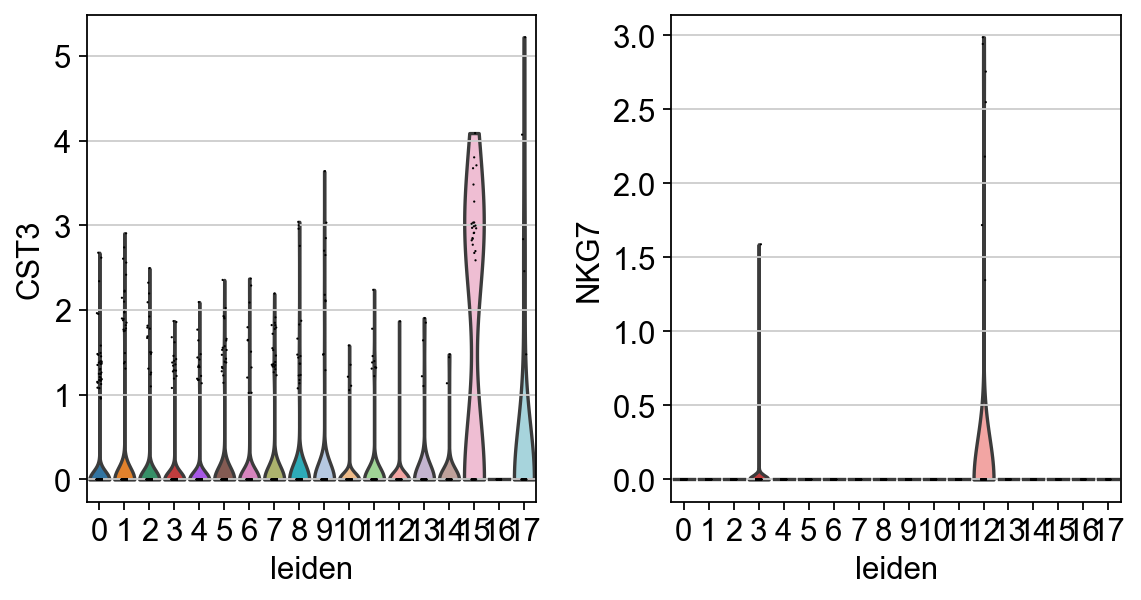

In [41]:
sc.pl.violin(adata, ['CST3', 'NKG7'], groupby='leiden')

In [122]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes','dd', 'cc', 'ff', 'ss','ss2', 'ee', 'aa', ]
adata.rename_categories('leiden', new_cluster_names)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


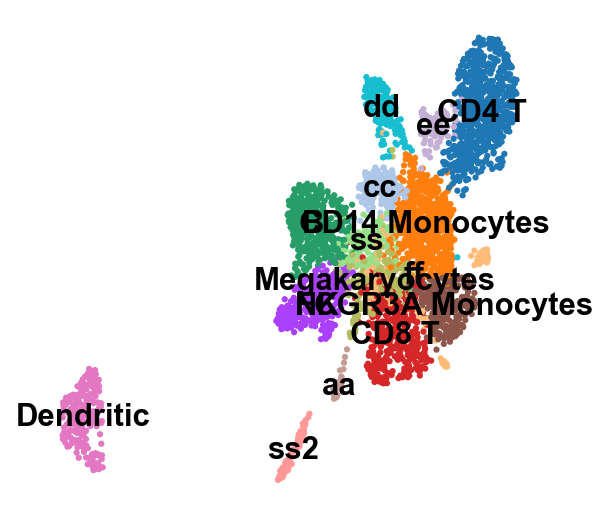

In [123]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

In [46]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');

KeyError: "Could not find keys '['CD79A', 'MS4A7', 'PPBP']' in columns of `adata.obs` or in adata.raw.var_names."